In [9]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [10]:
# Mount
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [11]:
# Load dataset

data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Mall_Customers.csv")
print(data)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [12]:
data = data.rename(columns={
    'Gender': 'gender',
    'Age': 'age',
    'Annual Income (k$)': 'income',
    'Spending Score (1-100)': 'score'
})
data.head()


,CustomerID,gender,age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
data.shape

(200, 5)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  200 non-null    int64 
 1   gender      200 non-null    object
 2   age         200 non-null    int64 
 3   income      200 non-null    int64 
 4   score       200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [15]:
# Level Encoding
from sklearn.preprocessing import LabelEncoder

#initialize  LabelEncoder
label_encoder = LabelEncoder()
data['gender']= label_encoder.fit_transform(data['gender'])
data['gender'].unique()


array([1, 0])

In [16]:
data.describe()

,CustomerID,gender,age,income,score
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


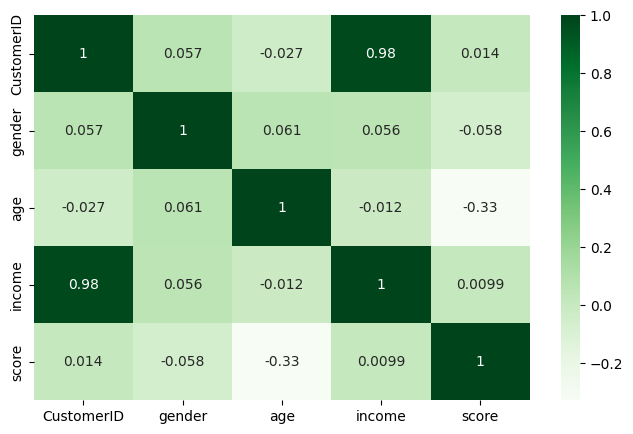

In [17]:
#Finding Correaltion between all the parameters in the update dataset

fig,ax = plt.subplots(figsize=(8,5))
sns.heatmap(data.corr(),annot=True,cmap="Greens",ax=ax)
plt.show()

In [18]:
mask= data['score']>50
data_score = data[mask]
data_score.head()


,CustomerID,gender,age,income,score
1,2,1,21,15,81
3,4,0,23,16,77
5,6,0,22,17,76
7,8,0,23,18,94
9,10,0,30,19,72


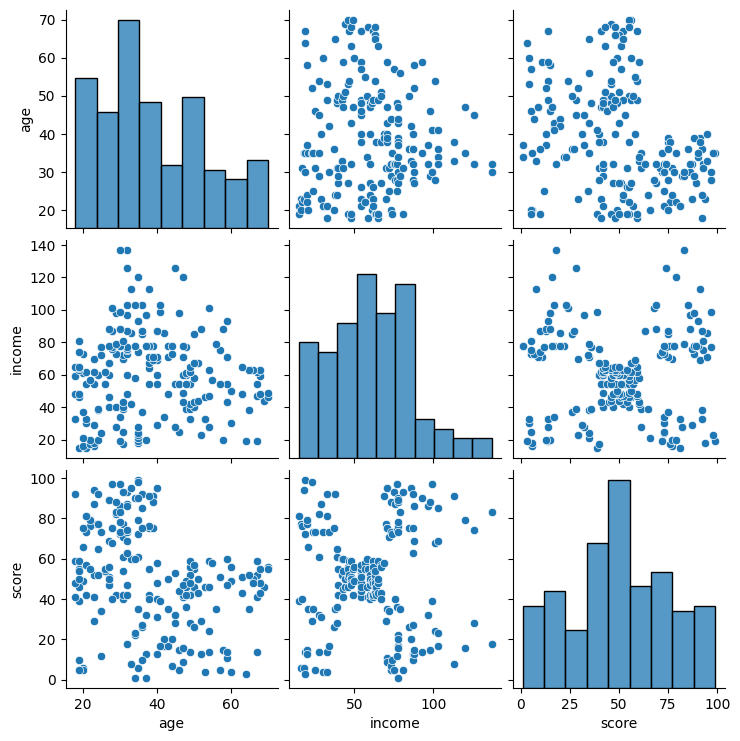

In [19]:
sns.pairplot(data,vars=['age','income','score'])
plt.show()

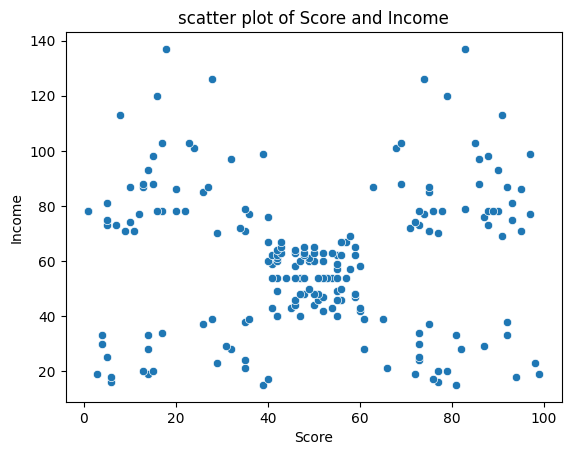

In [20]:
sns.scatterplot(x='score',y='income',data=data)
plt.title('scatter plot of Score and Income')
plt.xlabel('Score')
plt.ylabel('Income')
plt.show()

In [21]:
# Kmeans Clustering
#Split

X = data.iloc[: , [3,4]]
print(f"X Shape {X.shape}")
X.head()

X Shape (200, 2)


,income,score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [22]:
# Cluster using k-means


# segmentation using annual income and spending score
n_clusters = range(2 , 13)
inertia_errors = []
silhouette_scores = []
# Add `for` loop to train model and calculate inertia, silhouette score.
for k in n_clusters:
    model = KMeans(n_clusters= k , random_state= 42)
    #TRAIN MODEL
    model.fit(X)
    #CALCULATE INERTIA
    inertia_errors.append(model.inertia_)
    #CALCULATE SILHOUETTE SCORE
    silhouette_scores.append(silhouette_score(X , model.labels_))
print("Inertia:", inertia_errors[:5])
print()
print("Silhouette Scores:", silhouette_scores[:5])

Inertia: [183653.3289473683, 106348.37306211119, 73880.64496247198, 44448.45544793369, 40825.16946386947]

Silhouette Scores: [np.float64(0.39564531743995546), np.float64(0.46761358158775435), np.float64(0.4937945814354117), np.float64(0.553931997444648), np.float64(0.5128405328004378)]


In [23]:
# Elbow plot

fig = px.line(x= range(2 , 13) , y= inertia_errors , title="K-Means Model: Inertia vs Number of Clusters")
fig.update_layout(xaxis_title="Number of Clusters" , yaxis_title="Inertia")
fig.show()

In [24]:
# Create a line plot of `silhouette_scores` vs `n_clusters`

fig = px.line(x= n_clusters , y= silhouette_scores , title= "K-Means Model: Silhouette Score vs Number of Clusters")
fig.update_layout(xaxis_title= 'Number of Clusters' , yaxis_title= 'Silhouette Score')
fig.show();


In [25]:
# The best number of cluster is 5

final_model = KMeans(n_clusters=5 , random_state= 42)
final_model.fit(X)

KMeans(n_clusters=5, random_state=42)

In [26]:
labels = final_model.labels_
centroids = final_model.cluster_centers_
print(labels[:5])


[4 2 4 2 4]


In [27]:
test_labels = final_model.fit_predict(data[['age', 'income']])
test_labels

array([2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2,
       4, 2, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1,
       3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int32)

In [28]:
test_labels = final_model.predict([[50, 30]])
test_labels


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



array([4], dtype=int32)

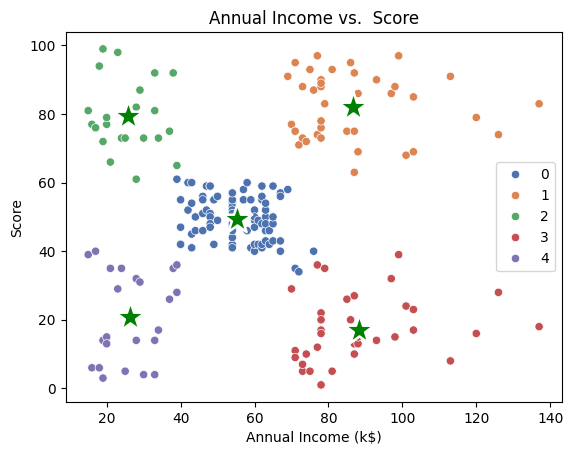

In [34]:
# communicate

# plot "Annual Income" vs "Spending Score" with final_model labels
sns.scatterplot(x=data['income'] , y= data['score'] ,
               hue=labels,
               palette='deep')
sns.scatterplot(
    x= centroids[:,0],
    y= centroids[: ,1],
    color= 'green',
    marker= '*',
    s= 500
)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Score")
plt.title("Annual Income vs.  Score");

In [35]:
# Create side-by-side bar chart of `xgb`

xgb= X.groupby(final_model.labels_).mean()
fig = px.bar(
    xgb,
    barmode= 'group',
    title= "Annual income and spending score by Cluster"
)
fig.update_layout(xaxis_title= "Clusters" , yaxis_title= 'Value')

fig.show()